<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL Security Data Analytics and Visualisation
## Portfolio Assignment: Part 2
### Academic year: 2024-25
## Conduct a security investigation to examine and classify different malware characteristics
---

For this task, the company **UWEtech** have enlisted your support as a security data analyst once again. They believe they have found malware on some of their workstations; however they do not know what malware it is. They also believe that some machines may be infected with different kinds of malware. They have asked you to identify what malware is running on each of the contaminated machines, so that they may understand more about how this incident has occurred on their corporate network.

**Dataset:** You will be issued a dataset for this task via GitLab: https://gitlab.uwe.ac.uk/a23-mccarthy/sdav-2024

**This exercise carries a weight of 30% towards your overall portfolio submission**

### Submission Documents
---

For Part 2 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART2.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for your portfolio submission is **THURSDAY 12th DECEMBER @ 14:00**. 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



features = pd.read_csv('/Users/yaminshweyihtay/SDAV/Part2/malware_data.csv', header=None)
features

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,224862.0,15842.0,12985.0,7387.0,13132.0,5112.0,8661.0,7990.0,14978.0,5656.0,...,3714.0,2892.0,9344.0,2415.0,2742.0,3023.0,11949.0,3662.0,5552.0,77433.0
1,21802.0,2127.0,2076.0,2028.0,1871.0,1622.0,1939.0,1502.0,2133.0,1689.0,...,1664.0,1607.0,1788.0,1394.0,1327.0,1453.0,1785.0,1559.0,1755.0,4882.0
2,24407.0,11682.0,7189.0,6538.0,7687.0,6848.0,4974.0,5377.0,7049.0,11642.0,...,5795.0,6053.0,6426.0,5435.0,4961.0,5026.0,5376.0,4180.0,5685.0,5775.0
3,7132.0,461.0,647.0,371.0,581.0,269.0,646.0,262.0,243.0,165.0,...,151.0,276.0,299.0,294.0,294.0,354.0,506.0,569.0,940.0,1516.0
4,5321.0,1108.0,985.0,955.0,958.0,890.0,971.0,919.0,945.0,963.0,...,933.0,975.0,945.0,924.0,879.0,952.0,956.0,900.0,942.0,1559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,23849.0,1489.0,1573.0,2649.0,1560.0,1025.0,922.0,1020.0,1042.0,938.0,...,993.0,968.0,1165.0,1041.0,1258.0,1753.0,1203.0,958.0,1315.0,4342.0
27996,9267.0,1056.0,981.0,930.0,1573.0,819.0,879.0,1064.0,1029.0,893.0,...,998.0,911.0,990.0,1039.0,930.0,833.0,904.0,891.0,976.0,2683.0
27997,25357.0,874.0,1008.0,2781.0,1518.0,939.0,4267.0,968.0,1103.0,1032.0,...,563.0,557.0,974.0,706.0,514.0,632.0,657.0,584.0,535.0,2431.0
27998,29010.0,6476.0,2969.0,5358.0,2827.0,4598.0,2172.0,4045.0,2496.0,3718.0,...,217.0,146.0,544.0,232.0,95.0,140.0,294.0,163.0,182.0,4005.0


In [3]:
labels = pd.read_csv('/Users/yaminshweyihtay/SDAV/Part2/malware_label.csv', header=None)
labels = labels.drop(0, axis=1)
labels = labels.rename(columns = {1:'label'})
labels.value_counts()

label     
bladabindi    2000
dealply       2000
emotet        2000
filetour      2000
flystudio     2000
gamarue       2000
gandcrab      2000
high          2000
razy          2000
startsurf     2000
upatre        2000
vittalia      2000
wannacry      2000
zbot          2000
Name: count, dtype: int64

In this dataset, we have collected data from 28000 systems (rows), where each system reports 256 parameters (columns).

We will first look at developing a small classifier "by hand", to help you understand how the classifier works, and then we will look at using the full dataset on more powerful classifiers to see whether we can classify the different malware varients on the set of workstations.

## Part 1: Developing a small classifier "by hand"

### Do not modify this cell

In [6]:
# DO NOT MODIFY THIS CELL
mal1_index = 17000
mal2_index = 21000
mal3_index = 12000
mal_range = 50
mal_test_range = 30

train_data = np.vstack([ features[mal1_index:mal1_index+mal_range][[0,1]].values, features[mal2_index:mal2_index+mal_range][[0,1]].values, features[mal3_index:mal3_index+mal_range][[0,1]].values ])
train_data = pd.DataFrame(train_data)
train_labels = np.vstack([ labels[mal1_index:mal1_index+mal_range].values, labels[mal2_index:mal2_index+mal_range].values, labels[mal3_index:mal3_index+mal_range].values ])
train_labels = pd.DataFrame(train_labels)
train_data['labels'] = train_labels
train_data = train_data.rename(columns={0:'x', 1:'y'})

test_data = np.vstack([ features[mal1_index+mal_range:mal1_index+mal_range+mal_test_range][[0,1]].values, features[mal2_index+mal_range:mal2_index+mal_range+mal_test_range][[0,1]].values, features[mal3_index+mal_range:mal3_index+mal_range+mal_test_range][[0,1]].values ])
test_data = pd.DataFrame(test_data)
test_labels = np.vstack([ labels[mal1_index+mal_range:mal1_index+mal_range+mal_test_range].values, labels[mal2_index+mal_range:mal2_index+mal_range+mal_test_range].values, labels[mal3_index+mal_range:mal3_index+mal_range+mal_test_range].values ])
test_labels = pd.DataFrame(test_labels)
test_data['labels'] = test_labels
test_data = test_data.rename(columns={0:'x', 1:'y'})

train_data

,x,y,labels
0,3114896.0,10815.0,wannacry
1,3436940.0,9551.0,wannacry
2,1812649.0,15343.0,wannacry
3,3067845.0,10541.0,wannacry
4,51591.0,21367.0,wannacry
...,...,...,...
145,78591.0,7734.0,razy
146,80429.0,5114.0,razy
147,2898.0,98.0,razy
148,183376.0,8477.0,razy


We now have a smaller sample of data to work with called train_data, that has three malware families included, and we have reduced the number of features to make it easier to understand the process of how the classifier operates.

### Question 1: Find the Centroid point of each of the three groups
#### (2 marks)

*Hint: We have filtered the sample to a new variable called **train_data**. Also, think about how to find the mid-point of a set of co-ordinate points **x** and **y**.*

In [9]:
# Normalize labels 
train_data['labels'] = train_data['labels'].str.lower().str.strip()

# Filter data for each malware type
wannacry_data = train_data[train_data['labels'] == 'wannacry']
razy_data = train_data[train_data['labels'] == 'razy']
startsurf_data = train_data[train_data['labels'] == 'startsurf']

# Calculate centroids for each group
wannacry_centroid = [wannacry_data['x'].mean(), wannacry_data['y'].mean()]
razy_centroid = [razy_data['x'].mean(), razy_data['y'].mean()]
startsurf_centroid = [startsurf_data['x'].mean(), startsurf_data['y'].mean()]

# Output the results
print("Wannacry: ", wannacry_centroid)
print("Razy: ", razy_centroid)
print("Startsurf: ", startsurf_centroid)

Wannacry:  [2181660.66, 11087.1]
Razy:  [100505.22, 6158.28]
Startsurf:  [478778.12, 3754.04]


### Question 2: Create a Scatter Plot that shows both the train data and the corresponding centroids. Colour-code your data by group, and use a different visual marker for the centroid.

#### (2 marks)

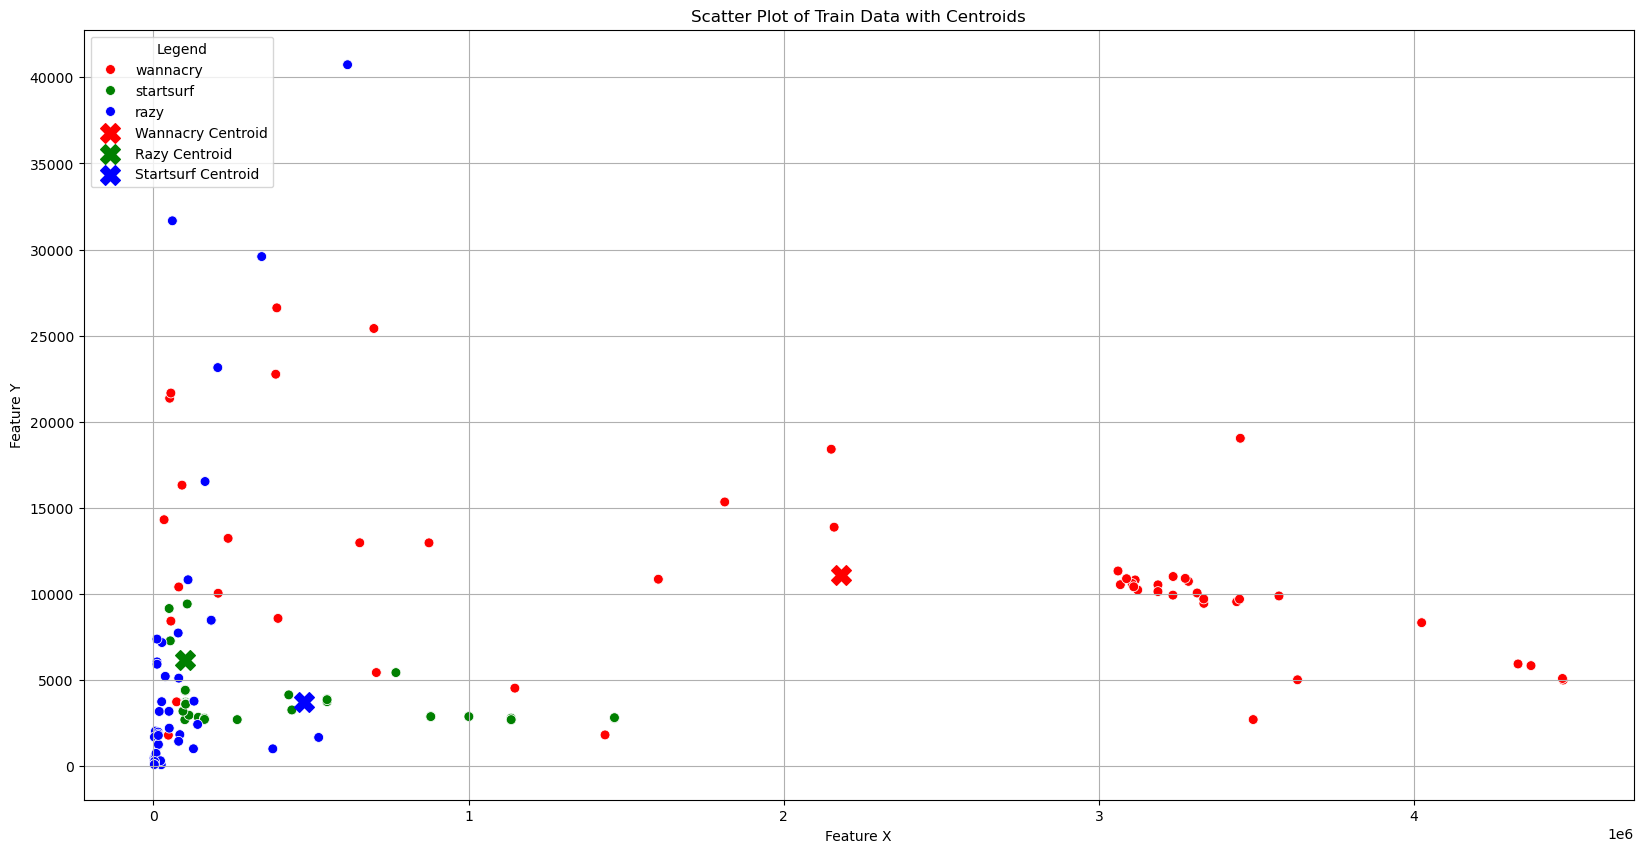

In [21]:
import seaborn as sns


# Step 1: Plot training data 

plt.figure(figsize=(20,10)) 

  

sns.scatterplot( 

    data=train_data,  

    x='x',  

    y='y',  

    hue='labels',  # Color-code by group 

    palette=['red', 'green', 'blue'],  # Assign colors to groups 

    style='labels',  # Distinct style for groups 

    markers=['o', 'o', 'o'],  # Uniform marker style for data points 

    s=50  # Marker size 

) 

  

# Step 2: Overlay centroids with distinct markers 

plt.scatter(*wannacry_centroid, color='red', marker='X', s=200, label='Wannacry Centroid') 

plt.scatter(*razy_centroid, color='green', marker='X', s=200, label='Razy Centroid') 

plt.scatter(*startsurf_centroid, color='blue', marker='X', s=200, label='Startsurf Centroid') 

  

# Step 3: Add plot formatting 

plt.title("Scatter Plot of Train Data with Centroids") 

plt.xlabel("Feature X") 

plt.ylabel("Feature Y") 

plt.legend(loc='upper left', title="Legend") 

plt.grid(True) 

  

# Step 4: Display plot 

plt.show() 



### Question 3a: For each point in test_data, calculate the Euclidean distance between the point and each of the three centroid points 

#### (3 marks)

### Question 3b: Use the closest centroid to assign membership and compare against the test data label to obtain a score of successful classifications 

#### (3 marks)

*Hint: You may find the clustering activity worksheet helpful for how to approach this task, and you will likely want to answer both questions within the same for loop below.*

In [13]:
# Extract x and y coordinates and labels from test_data
test_x = test_data['x'].values
test_y = test_data['y'].values
true_labels = test_data['labels'].values

# Define centroids
wannacry_centroid = np.array([wannacry_centroid[0], wannacry_centroid[1]])
razy_centroid = np.array([razy_centroid[0], razy_centroid[1]])
startsurf_centroid = np.array([startsurf_centroid[0], startsurf_centroid[1]])

# Calculate distances to each centroid
distances_wannacry = np.sqrt((test_x - wannacry_centroid[0])**2 + (test_y - wannacry_centroid[1])**2)
distances_razy = np.sqrt((test_x - razy_centroid[0])**2 + (test_y - razy_centroid[1])**2)
distances_startsurf = np.sqrt((test_x - startsurf_centroid[0])**2 + (test_y - startsurf_centroid[1])**2)

# Stack distances into a 2D array (rows = test points, columns = centroids)
distances = np.vstack((distances_wannacry, distances_razy, distances_startsurf)).T

# Find the index of the minimum distance for each test point
closest_centroid_indices = np.argmin(distances, axis=1)
#3b
# Map indices to labels
dist_labels = np.array(['wannacry', 'razy', 'startsurf'])
predicted_labels = dist_labels[closest_centroid_indices]

# Compare predicted labels with true labels
score = np.sum(predicted_labels == true_labels)

# Print the final score
print("Score:", score)


Score: 63


### Task 4: Provide a final accuracy score for the performance of your "by hand" classifier 

#### (1 marks)

In [15]:
# Calculate the total number of test points 

total_test_points = test_data.shape[0] 

  

# Compute accuracy 

accuracy = (score / total_test_points) * 100 

  

# Output the final accuracy score 

print(f"Final Accuracy: {accuracy:.2f}%") 

Final Accuracy: 70.00%


## Part 2: Developing a large-scale ML classifier

We will now extend the earlier principles for the full dataset. Essentially the task is the same, we want to find the parameters that allow us to clearly separate groups for classification. You will want to consult the [scikit-learn documentation](https://scikit-learn.org/stable/index.html) to answer the following questions.

### Question 5: Scale the Features DataFrame using the StandardScaler function 

#### (1 mark)

*Hint: The variable **features** contains all of the numerical parameters that we will use to train our ML model, which we need to normalise using this function.*

In [18]:
from sklearn.preprocessing import StandardScaler 

# Step 1: Initialize the StandardScaler 

scaler = StandardScaler() 

  

# Step 2: Fit the scaler to the features and transform 

scaled_features = scaler.fit_transform(features) 

  

# Step 3: Convert scaled features back to a DataFrame for better readability 

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns, index=features.index) 

  

# Step 4: Output the scaled features DataFrame (optional) 

print(scaled_features_df.head()) 


        0         1         2         3         4         5         6    \
0 -0.097820  0.672159  0.826630  0.380661  0.647650  0.204495  0.792002   
1 -0.355085 -0.291567 -0.274569 -0.254820 -0.323318 -0.234858 -0.178266   
2 -0.351784  0.379844  0.241558  0.279985  0.178160  0.423038  0.259812   
3 -0.373671 -0.408634 -0.418818 -0.451310 -0.434547 -0.405185 -0.364900   
4 -0.375965 -0.363170 -0.384699 -0.382059 -0.402040 -0.327008 -0.317989   

        7         8         9    ...       246       247       248       249  \
0  0.691117  1.028243  0.432558  ...  0.191715  0.044177  0.845365 -0.010620   
1 -0.244002 -0.310024 -0.182924  ... -0.155188 -0.155994 -0.248598 -0.175093   
2  0.314504  0.202153  1.361289  ...  0.543863  0.536584  0.422895  0.475873   
3 -0.422724 -0.506936 -0.419373  ... -0.411219 -0.363332 -0.464176 -0.352293   
4 -0.328030 -0.433797 -0.295563  ... -0.278888 -0.254445 -0.370648 -0.250806   

        250       251       252       253       254       255  
0  0

### Question 6: Use the LabelEncoder function on the Labels variable to obtain numerical label data 

#### (1 mark)

In [23]:
from sklearn.preprocessing import LabelEncoder 

# Step 1: Initialize the LabelEncoder 

label_encoder = LabelEncoder() 

  

# Step 2: Fit and transform the Labels variable 

numerical_labels = label_encoder.fit_transform(labels['label']) 

  

# Step 3: Add the encoded labels to a DataFrame (optional, for readability) 

encoded_labels_df = pd.DataFrame(numerical_labels, columns=['Encoded Label']) 

  

# Step 4: Output the encoded labels (optional, for verification) 

print(encoded_labels_df.head()) 

#unique labels ......


   Encoded Label
0              7
1              7
2              7
3              7
4              7


### Question 7: Prepare the dataset for ML testing using the Train-Test-Split function
#### (1 mark)

In [25]:
# Splitting the Dataset into training set and testing set 

from sklearn.model_selection import train_test_split

#split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, numerical_labels, test_size = 0.2, random_state = 42
)



#Display the shapes of the resulting datasets 
print(f'X_train shape: {X_train.shape}')
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {y_train.shape}")
print(f"Y_test shape: {y_test.shape}")

X_train shape: (22400, 256)
X_test shape: (5600, 256)
Y_train shape: (22400,)
Y_test shape: (5600,)


### Question 8: Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data. 

#### (3 marks)

In [29]:
from sklearn.neural_network import MLPClassifier 

from sklearn.metrics import accuracy_score 


# Step 1: Initialize the MLP Classifier 

mlp_classifier = MLPClassifier( 

    hidden_layer_sizes=(100,),  # One hidden layer with 100 neurons 

    activation='relu',         # Activation function 

    solver='adam',             # Optimizer 

    max_iter=500,              # Maximum iterations 

    random_state=42            # For reproducibility 

) 

  

# Step 2: Train the MLP on the training data 

mlp_classifier.fit(X_train, y_train) 

  

# Step 3: Predict labels for the test data 

y_pred = mlp_classifier.predict(X_test) 

  

# Step 4: Calculate accuracy 

accuracy = accuracy_score(y_test, y_pred) 

  

# Output the accuracy score 

print(f"Accuracy of MLP Classifier: {accuracy * 100 :.2f} % ") 


Accuracy of MLP Classifier: 80.62 % 


### Question 9: Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data. 

#### (3 marks)

In [33]:
from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import accuracy_score 

# Step 1: Initialize the Random Forest Classifier 

rf_classifier = RandomForestClassifier( 

    n_estimators=100,  # Number of trees in the forest 

    max_depth=None,    # Maximum depth of the trees (None means nodes are expanded until all leaves are pure) 

    random_state=42    # For reproducibility 

) 

  

# Step 2: Train the RF classifier on the training data 

rf_classifier.fit(X_train, y_train) 

  

# Step 3: Predict labels for the test data 

y_pred = rf_classifier.predict(X_test) 

  

# Step 4: Calculate accuracy 

accuracy = accuracy_score(y_test, y_pred) 

  

# Output the accuracy score 
print(f"Accuracy of Random Forest Classifier: {accuracy * 100:.2f}%")

Accuracy of Random Forest Classifier: 87.77%


### Question 10: Describe what you believe are the key findings of this task, comparing the *by-hand* classifier with the MLP classifier. As part of your discussion, consider the volume of data in both approaches and the issues of data separability. Give justifications for your answer. Limit your response to a maximum of 300 words.

#### (10 marks).